In [4]:
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent

/home/cooper-cooper/Desktop/marek/agent.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.q_table = np.array(self.q_table)
/home/cooper-cooper/Desktop/marek/agent.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.n_table = np.array(self.n_table)


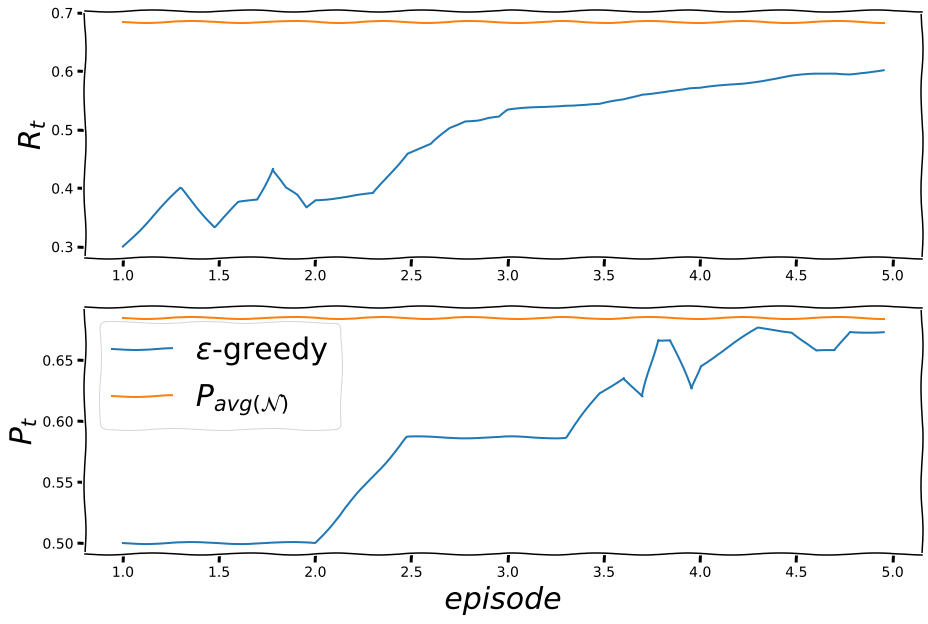

In [12]:
layers = 2
n_actions = 30

folder = str(layers)+"L_"+str(n_actions)+"a"+"_LC"
folder = "2L_10a_LC"

times, rcum, pt = np.load(folder+"/run_2/tables/learning_curves.npy")

agent = Agent(layers=layers,n_actions=n_actions)
o_avg = np.load("resultsdp/0.01/2L_objective_function.npy")

plt.xkcd()
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(np.log10(times), rcum/times)
plt.plot(np.log10(times), np.ones(len(times))*o_avg[0,0], label=r'$P_{avg(\mathcal{N})}$')

plt.ylabel(r'$R_t$',size=30)
plt.subplot(212)
plt.plot(np.log10(times),pt, label=r'$\epsilon$'+"-greedy")
plt.plot(np.log10(times), np.ones(len(times))*o_avg[0,0], label=r'$P_{avg(\mathcal{N})}$')
plt.ylabel(r'$P_t$',size=30)
plt.xlabel(r'$episode$',size=30)
plt.legend(prop={"size":30})
plt.savefig("compound_lossy.png")